In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import getdist.plots as gdplt
from getdist.mcsamples import MCSamples, MCSamplesFromCobaya
import lensutils_modified as lu

nwalkers=32 is for P(H0)~N(70,30) only, others reamin flat priors.

In [2]:
cosmologies = ["FLCDM", "oLCDM" ,"FwCDM", "w0waCDM"]
lenses = ["B1608DdDdt", "RXJ1131_AO_HST", "HE0435_AO_HST", "J1206", "WFI2033", "PG1115"]
samplesdir = "Tee2020"
nwalkers = 32 # use 32 for a good sampling 
nsamples = 20000   # use 20000 for a good sampling 

result_holicow = []
for cosmology in cosmologies:
    savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
    samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
    samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
    H0s_list = [[s[0] for s in samples] for samples in samples_list]
    Oms_list = [[s[1] for s in samples] for samples in samples_list]
    result2 = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1])], \
                        names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$"], \
                    label='H0LiCow-{}'.format(cosmology))
    result2.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result_holicow.append(result2)

planck = np.loadtxt('planck2018/cobaya_planck2018.txt')
result1 = MCSamples(samples=[planck[:,2],planck[:,25],planck[:,3]], names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$\mathrm{log}A$"],label='Planck2018')
result1.updateSettings({'contours': [0.68, 0.95, 0.99]})

result_holicow.append(result1)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


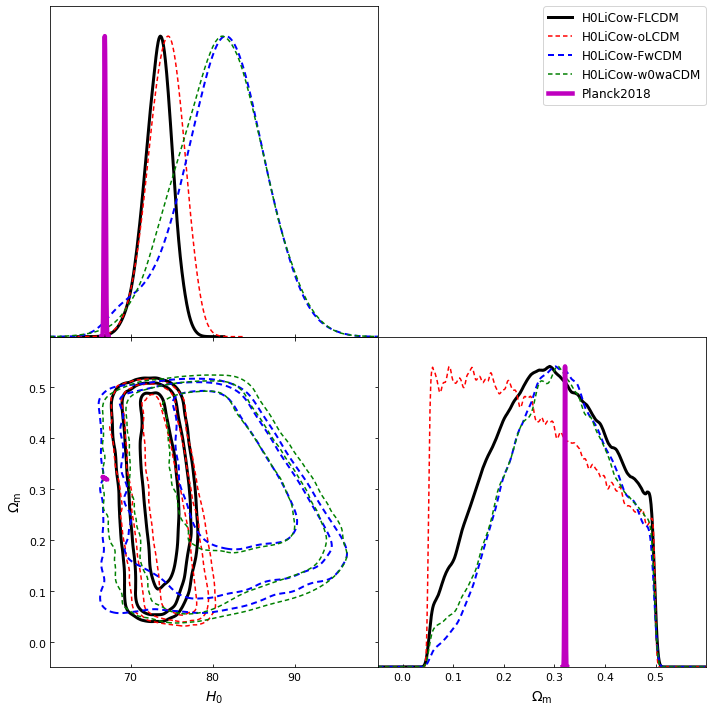

In [3]:
gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result_holicow, filled=False,contour_lws=[3,1.5, 2, 1.5,4.5],\
                     contour_ls=['-','--','--','--','-'],\
                     line_args=[{'ls':'-'},{'ls':'--'},{'ls':'--'},{'ls':'--'},{'ls':'-'}],)
plt.savefig('H0LiCOW-Planck-H0N.png')

Removed no burn in


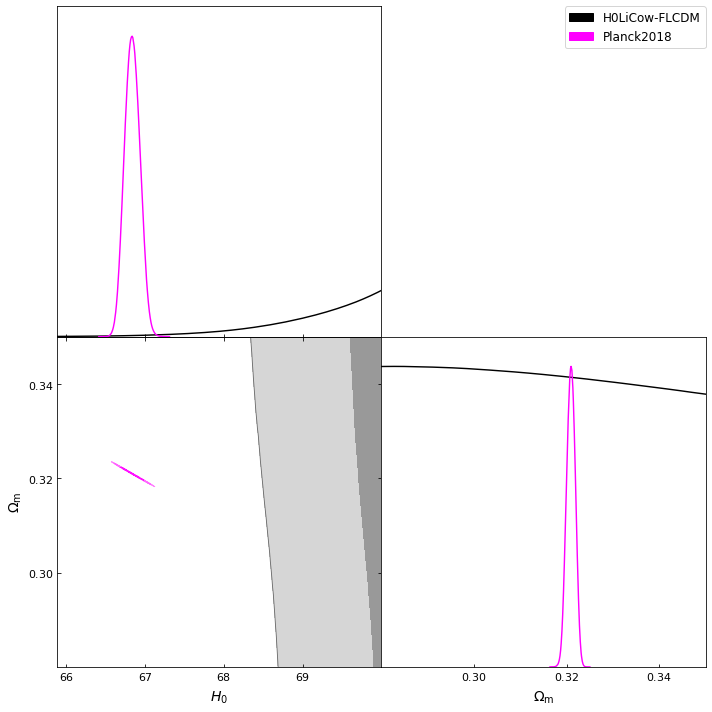

In [4]:
result_holicow2 = []
for cosmology in cosmologies[:1]:
    savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
    samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
    samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
    H0s_list = [[s[0] for s in samples] for samples in samples_list]
    Oms_list = [[s[1] for s in samples] for samples in samples_list]
    result3 = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1])], \
                        names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$"], \
                    label='H0LiCow-{}'.format(cosmology),ranges=[[62,70],[0.28,0.35]])
    result3.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result_holicow2.append(result3)
result_holicow2.append(result1)
gdplot2 = gdplt.get_subplot_plotter(subplot_size=5)
gdplot2.settings.num_plot_contours = 3
gdplot2.triangle_plot(result_holicow2, filled=True,contour_colors=['black','magenta'] )
plt.savefig('H0LiCOW-Planck-H0N-zoom.png')

In [5]:
cosmologies = ["FLCDM", "oLCDM" ,"FwCDM","w0waCDM"]
result3 = []
cosmology=cosmologies[0]
savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
H0s_list = [[s[0] for s in samples] for samples in samples_list]
Oms_list = [[s[1] for s in samples] for samples in samples_list]
for i in range(len(lenses)):
    result = MCSamples(samples=[np.asarray(H0s_list[i]),np.asarray(Oms_list[i])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,lenses[i]))
    result.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result3.append(result)
result = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,"joint"))
result3.append(result)

result4 = []
cosmology=cosmologies[2]
savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
H0s_list = [[s[0] for s in samples] for samples in samples_list]
Oms_list = [[s[1] for s in samples] for samples in samples_list]
ws_list = [[s[2] for s in samples] for samples in samples_list]
for i in range(len(lenses)):
    result = MCSamples(samples=[np.asarray(H0s_list[i]),np.asarray(Oms_list[i]),np.asarray(ws_list[i])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$w$"], \
                label='H0LiCow-{}-{}'.format(cosmology,lenses[i]))
    result.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result4.append(result)
result = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1]),np.asarray(ws_list[-1])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$w$"], \
                label='H0LiCow-{}-{}'.format(cosmology,"joint"))
result4.append(result)
    
result5 = []
cosmology=cosmologies[1]
savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
H0s_list = [[s[0] for s in samples] for samples in samples_list]
Oms_list = [[s[1] for s in samples] for samples in samples_list]
Oks_list = [[s[2] for s in samples] for samples in samples_list]
for i in range(len(lenses)):
    result = MCSamples(samples=[np.asarray(H0s_list[i]),np.asarray(Oms_list[i]),np.asarray(Oks_list[i])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$\Omega_{\mathrm{k}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,lenses[i]))
    result.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result5.append(result)
result = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1]),np.asarray(Oks_list[-1])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$\Omega_{\mathrm{k}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,"joint"))
result5.append(result)

result6 = []
cosmology=cosmologies[3]
savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
H0s_list = [[s[0] for s in samples] for samples in samples_list]
Oms_list = [[s[1] for s in samples] for samples in samples_list]
w0s_list = [[s[2] for s in samples] for samples in samples_list]
was_list = [[s[3] for s in samples] for samples in samples_list]
for i in range(len(lenses)):
    result = MCSamples(samples=[np.asarray(H0s_list[i]),np.asarray(Oms_list[i]),np.asarray(w0s_list[i]),np.asarray(was_list[i])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$w_{\mathrm{0}}$",r"$w_{\mathrm{a}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,lenses[i]))
    result.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result6.append(result)
result = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1]),np.asarray(w0s_list[-1]),np.asarray(was_list[-1])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$w_{\mathrm{0}}$",r"$w_{\mathrm{a}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,"joint"))
result6.append(result)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


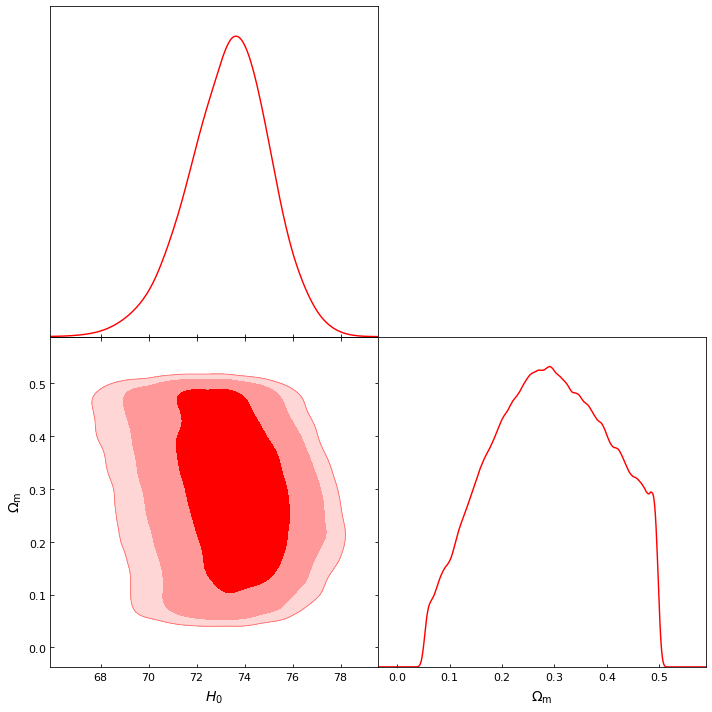

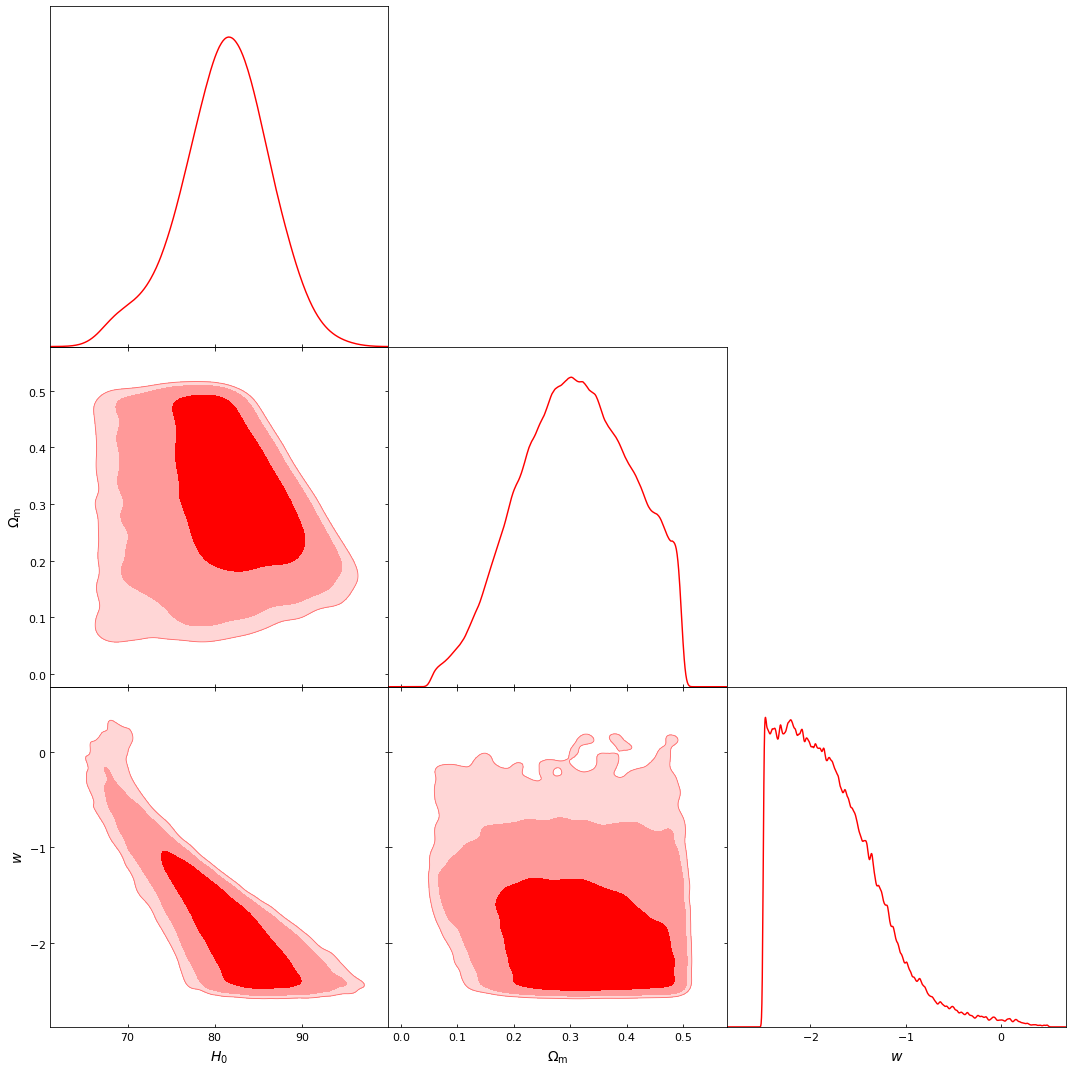

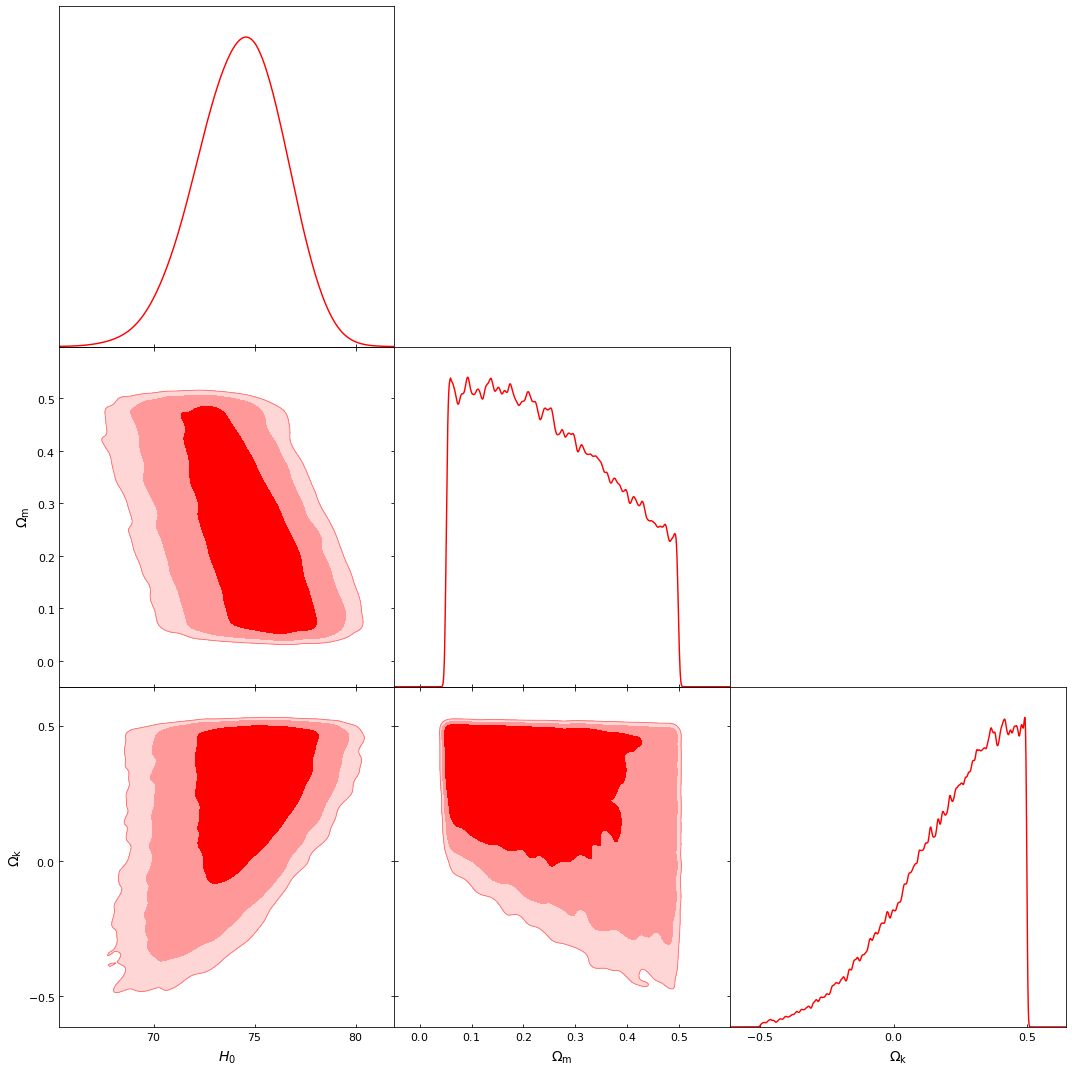

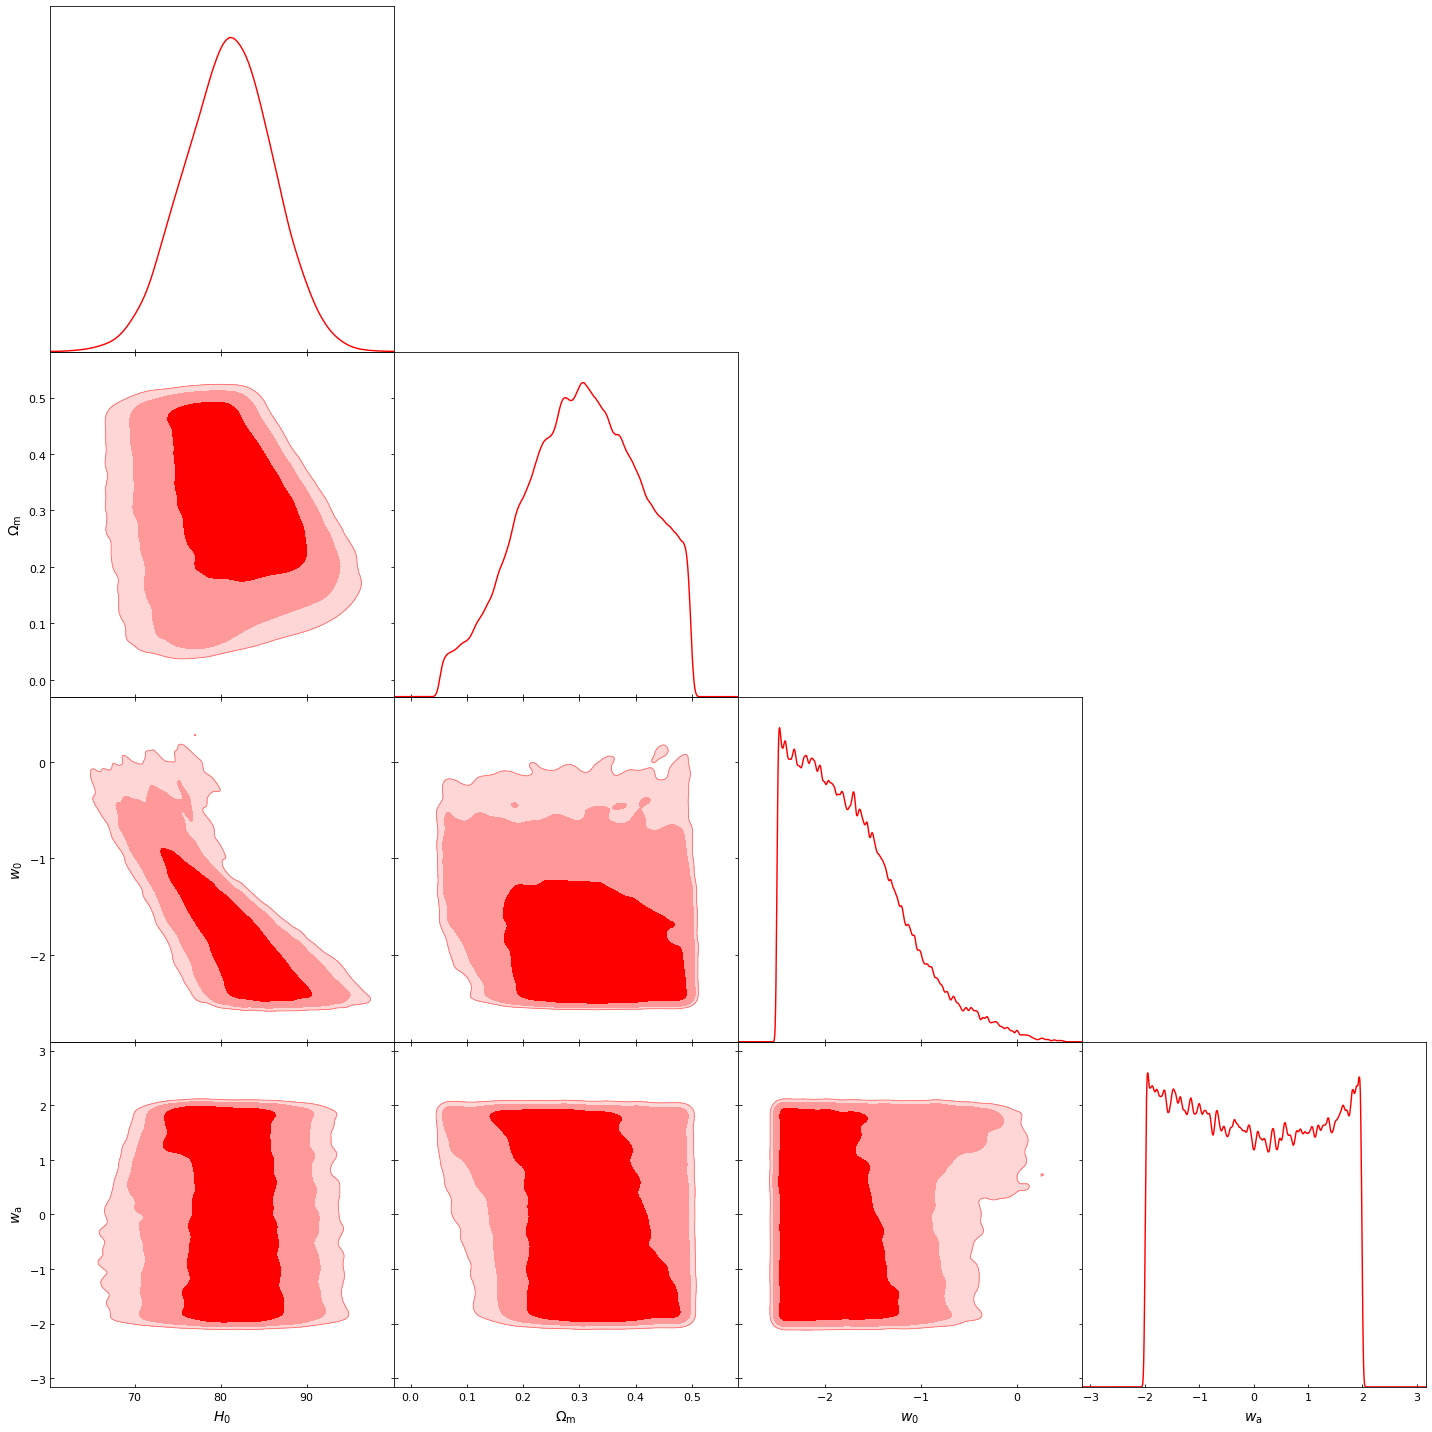

In [6]:
gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result3[-1:], filled=True,contour_colors=['red'])
plt.savefig('H0LiCOW-FLCDM-allN.png')

gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result4[-1:], filled=True,contour_colors=['red'])
plt.savefig('H0LiCOW-FwCDM-allN.png')

gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result5[-1:], filled=True,contour_colors=['red'])
plt.savefig('H0LiCOW-oLCDM-allN.png')

gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result6[-1:], filled=True,contour_colors=['red'])
plt.savefig('H0LiCOW-w0waCDM-allN.png')

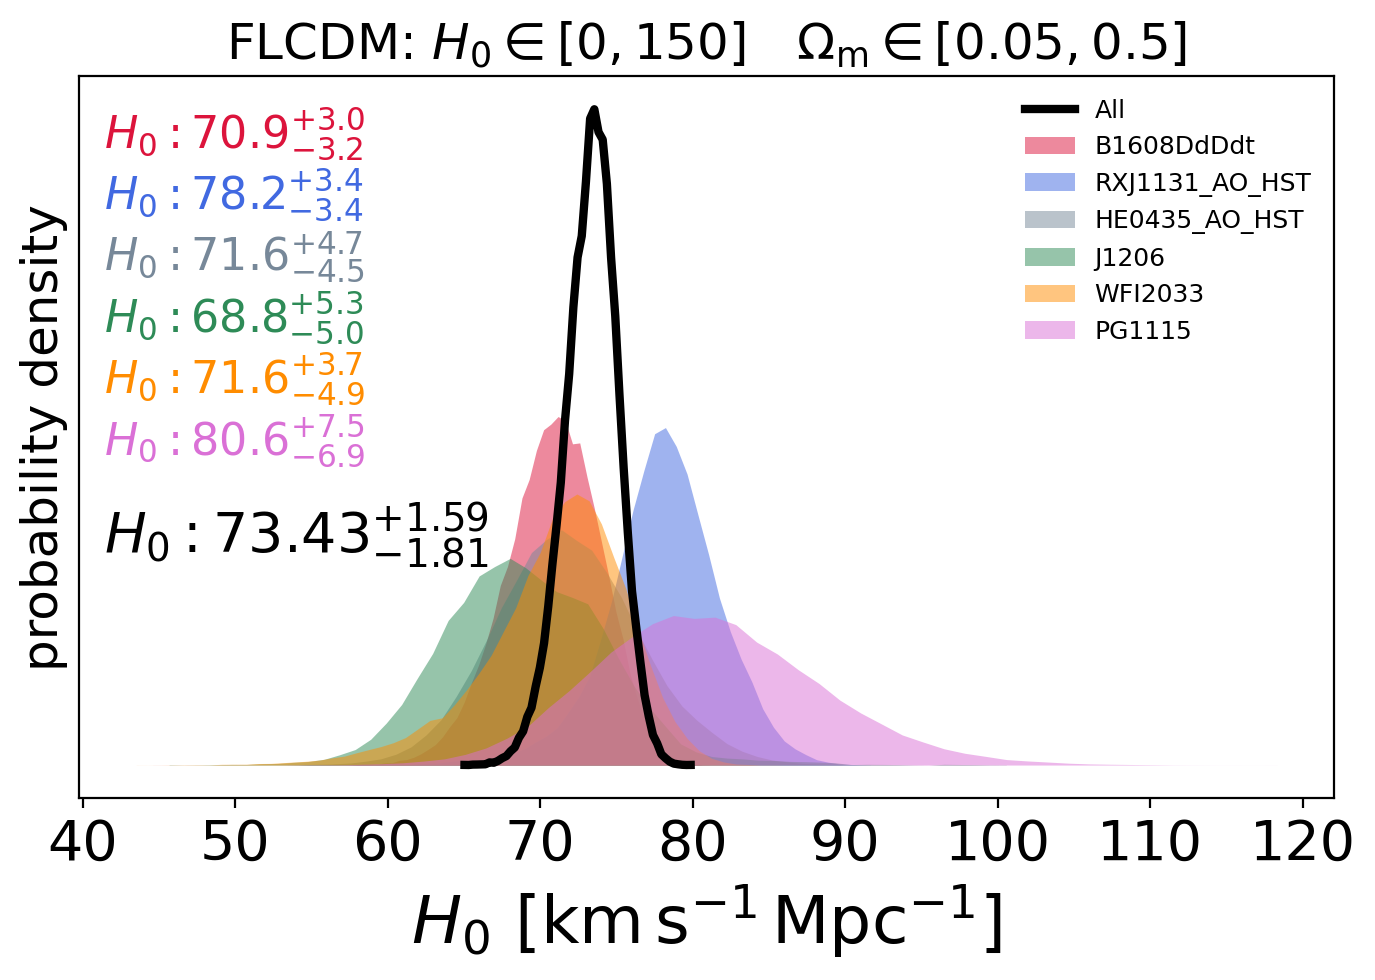

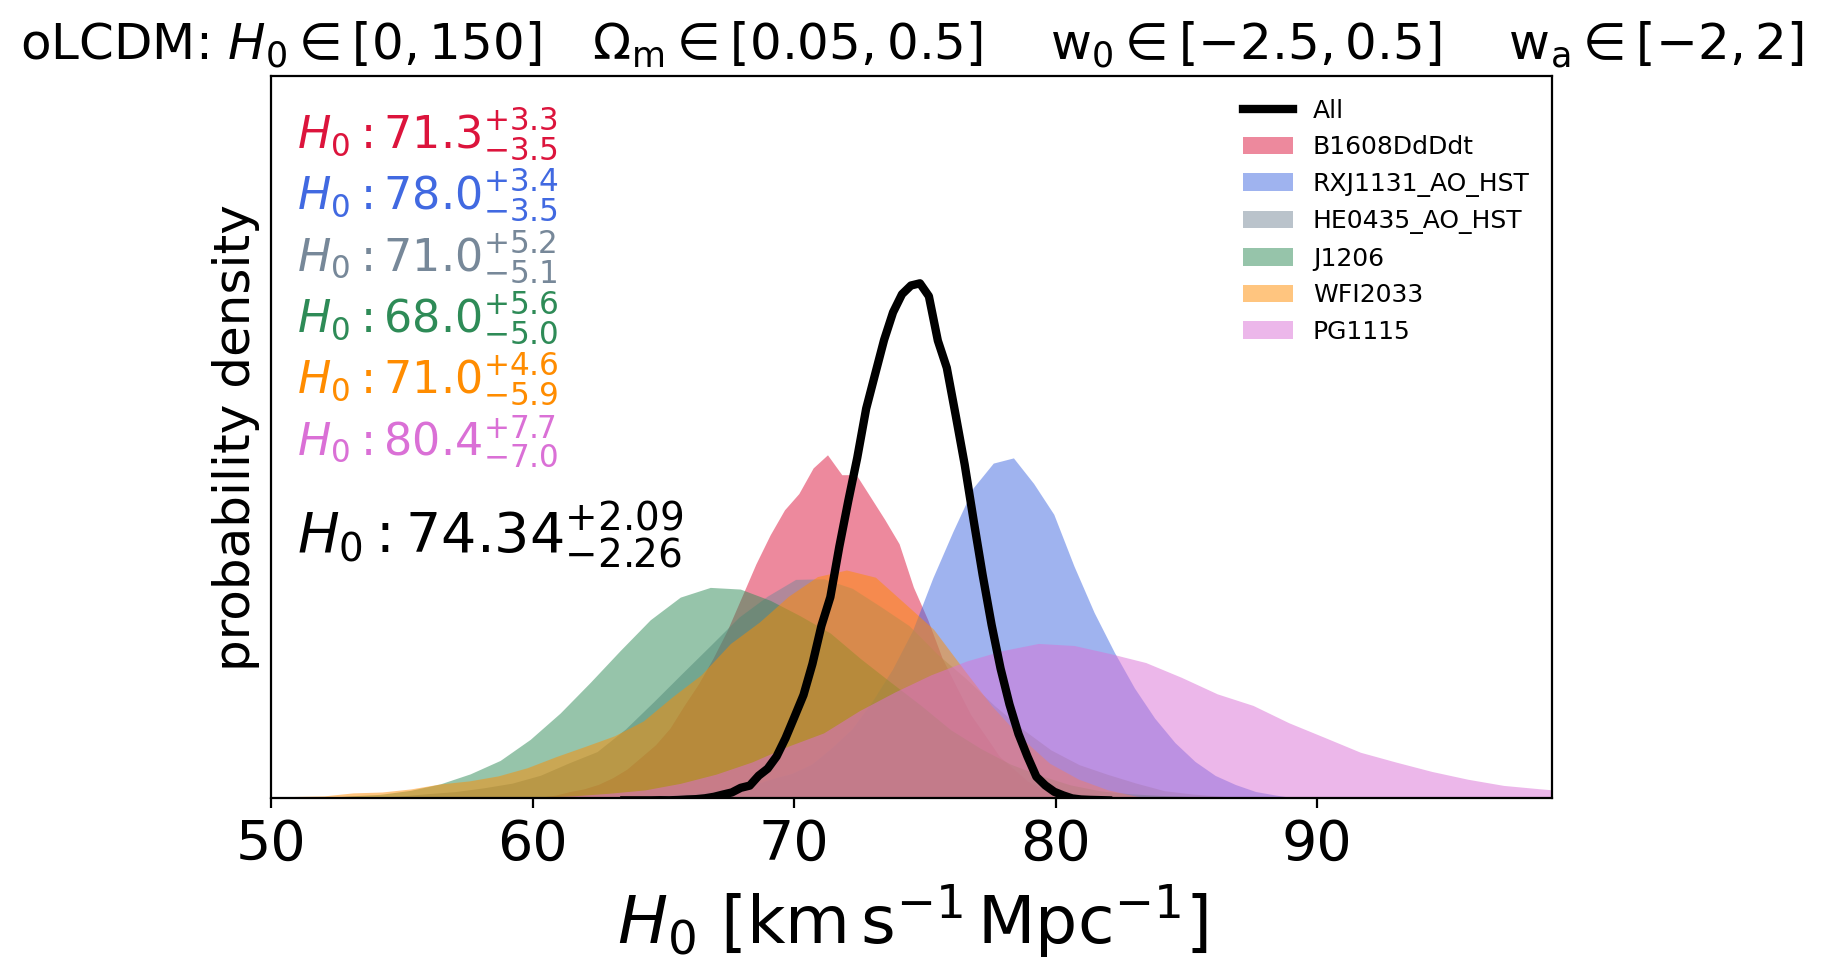

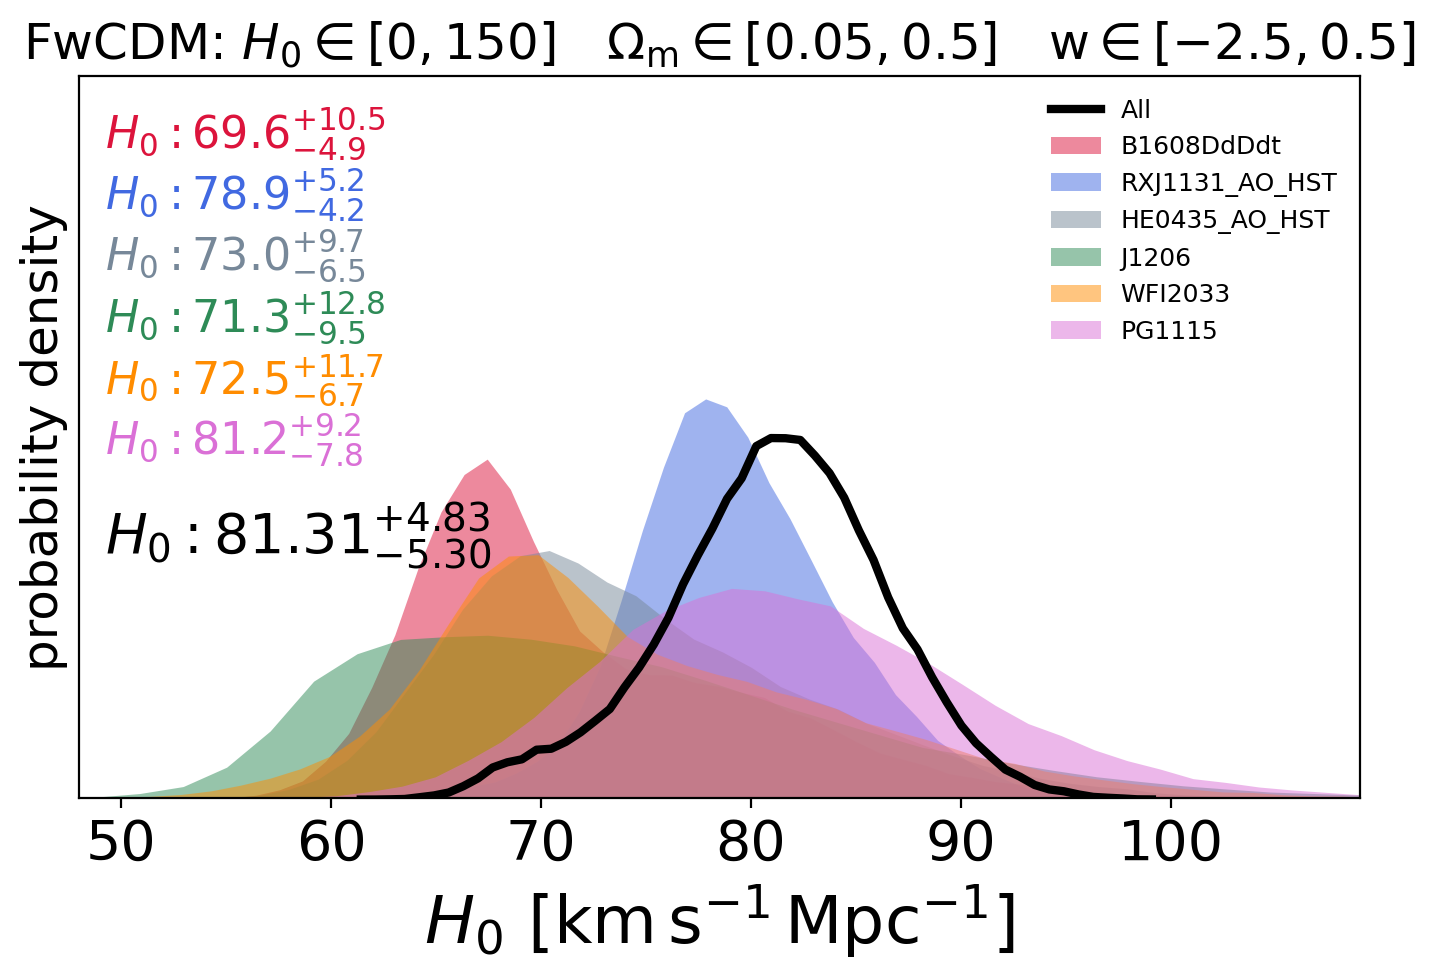

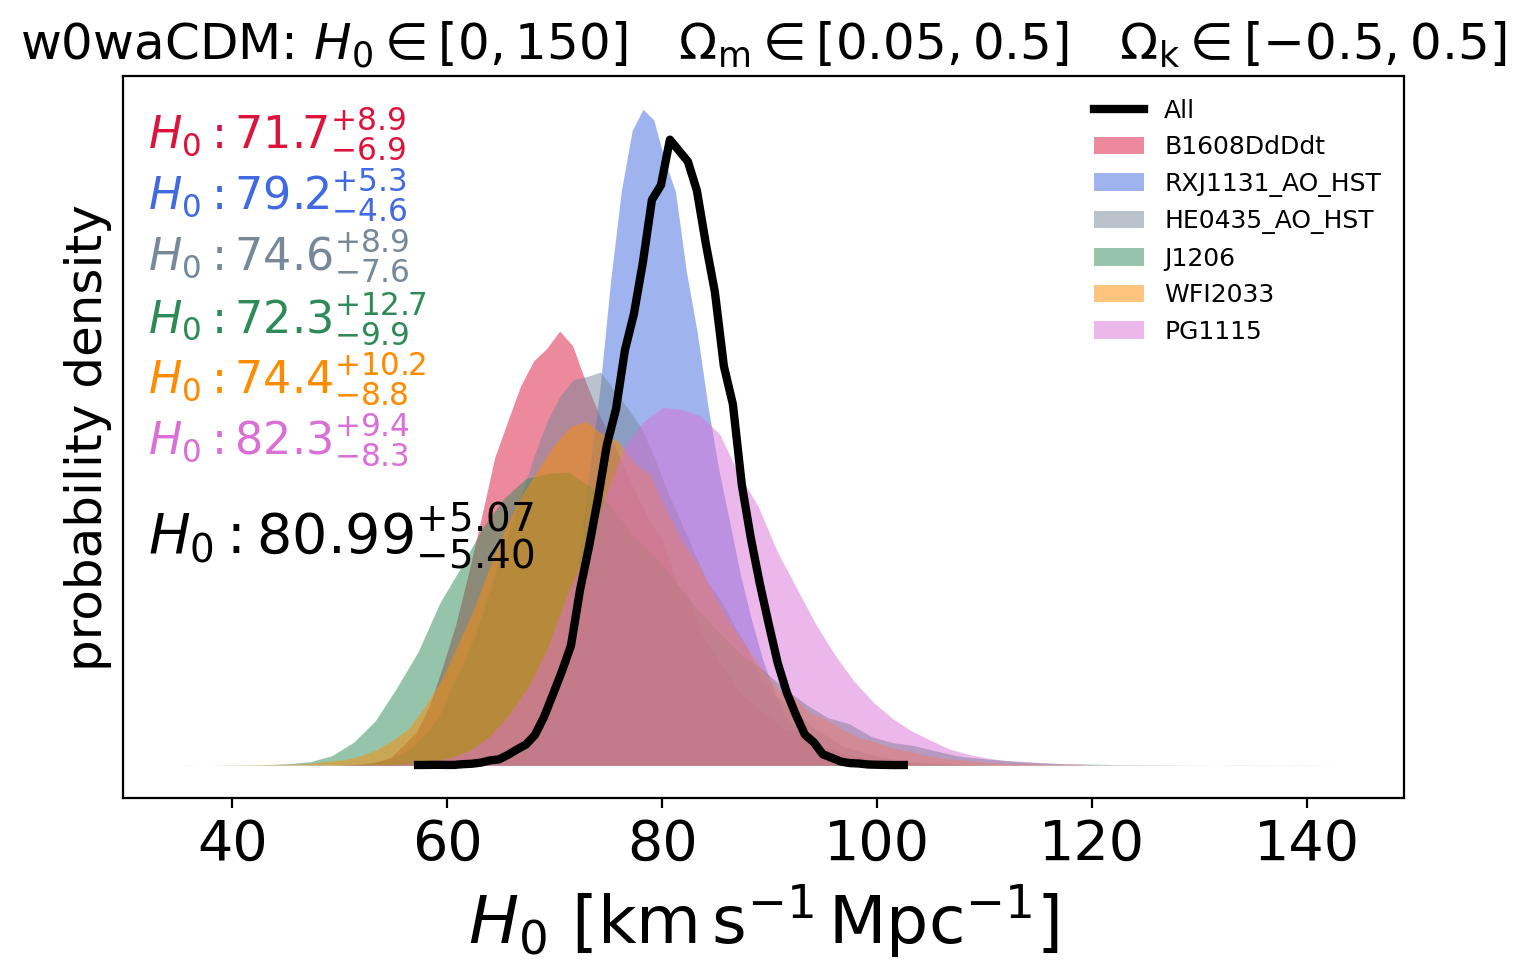

In [7]:
add_logo=False
save_plot=False
plot_combined = True 
for cosmology in cosmologies:

    savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
    samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
    samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))    
    
    ### plot nice H0s histogram 
    plt.figure(figsize=(7, 5), dpi=200)
    ax = plt.subplot(1, 1, 1)

    H0s_list = [[s[0] for s in samples] for samples in samples_list]
    try:
        others_list = [[s[1] for s in samples] for samples in samples_list]
    except:
         others_list = H0s_list
    toplot = H0s_list
    
    percentiles = [16, 50, 84]
    #colors = ["crimson", "royalblue", "lightslategrey", "seagreen", "darkorange", "orchid", "mediumturquoise", "black"]
    colors = ["crimson", "royalblue", "lightslategrey", "seagreen", "darkorange", "orchid", "black"]
    nbins = 55
    title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
    fmt = "{{0:{0}}}".format(".1f").format
    fmt2 = "{{0:{0}}}".format(".2f").format


    # loop over the lenses, shaded histograms
    for il, lens in enumerate(lenses):

        h, be = np.histogram(toplot[il], bins=nbins, density=True)
        xs = [(b+be[ind+1])/2. for ind, b in enumerate(be[:-1])]
        plt.plot(xs, h, alpha=0.5, color=colors[il], linewidth=0.0)
        plt.fill_between(xs, h, alpha=0.5, color=colors[il], linewidth=0.0, label=r'%s' % lens)

        # add the values
        pcs = np.percentile(toplot[il], q=percentiles)
        txt = r'$H_{0}: $' + title.format(fmt(pcs[1]), fmt(pcs[1]-pcs[0]), fmt(pcs[2]-pcs[1]))
        plt.annotate(txt, xy=(0.0, 0.0), xytext=(0.02, 0.9-0.085*il), xycoords='axes fraction',
                     fontsize=16, color=colors[il])


    if plot_combined:
    
        # plot the combined result
        h, be = np.histogram(toplot[-1], bins=nbins, density=True)
        xs = [(b+be[ind+1])/2. for ind, b in enumerate(be[:-1])]
        plt.plot(xs, h, alpha=1.0, color=colors[-1], linewidth=3.0, label=r'All')

        # add the values
        pcs = np.percentile(toplot[-1], q=percentiles)
        txt = r'$H_{0}: $' + title.format(fmt2(pcs[1]), fmt2(pcs[1] - pcs[0]), fmt2(pcs[2] - pcs[1]))
        plt.annotate(txt, xy=(0.0, 0.0), xytext=(0.02, 0.85 - 0.085 * len(lenses)), xycoords='axes fraction',
                     fontsize=20, color=colors[-1])
    
    if add_logo : 
        #add H0licow logo 
        from matplotlib._png import read_png
        from matplotlib.offsetbox import OffsetImage, AnnotationBbox

        im = read_png(os.path.join("h0licow_transparent.png"))
        imagebox = OffsetImage(im, zoom=0.09, interpolation="sinc", resample = True)
        ab = AnnotationBbox(imagebox,  xy=(0.88, 0.45), xycoords='axes fraction', xybox = (0, 0),
                boxcoords="offset points",
                pad=0.0, frameon=False
                )
        ax.add_artist(ab)


    # fine tune
    if cosmology == "FLCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} \in \rm{[0.05, 0.5]}$"%(cosmology)
    elif cosmology == "FwCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} \in \rm{[0.05, 0.5]} \ \ \  w \in \rm{[-2.5, 0.5]}$"%(cosmology)
    elif cosmology == "oLCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} \in \rm{[0.05, 0.5]} \ \ \ \ w_{\rm{0}} \in \rm{[-2.5, 0.5]}\ \ \ \ w_{\rm{a}} \in \rm{[-2, 2]}$"%(cosmology)
    elif cosmology == "w0waCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} \in \rm{[0.05, 0.5]} \ \ \ \Omega _{\rm{k}} \in \rm{[-0.5, 0.5]}$"%(cosmology)
    elif cosmology == "ULCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} = 0.3$"%(cosmology)

    plt.title(title, fontsize=18)
    plt.xlabel(r"$H_{\rm{0}}\rm{\ [km\,s^{-1}\,Mpc^{-1}]}$", fontsize=24)
    plt.ylabel("probability density", fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=20)
    plt.yticks([])

    legend = plt.legend(loc="upper right", prop={'size': 9} )
    legend.get_frame().set_alpha(0.0)
    if cosmology == "FLCDM":
        pass
#         plt.xlim([50, 99])
        #plt.ylim([max(h)*0.005, max(h)*1.25])
#         plt.ylim([0.0013492736086723317, 0.33731840216808295])
    elif cosmology == "oLCDM":
        plt.xlim([50, 99])
        plt.ylim([max(h)*0.005, max(h)*1.4])
    elif cosmology == "FwCDM":
        plt.xlim([48, 109])
        plt.ylim([max(h)*0.005, max(h)*2.0])
    plt.tight_layout()

    if save_plot : 
        plt.savefig(os.path.join(savedir, "H0_%s_%s.png" % (cosmology, "+".join([l.name for l in lenses]))))
        plt.savefig(os.path.join(savedir, "H0_%s_%s.pdf" % (cosmology, "+".join([l.name for l in lenses]))))
    plt.show()
    

nwalkers=30 gives all prior parameters a normal distribution.

In [8]:
cosmologies = ["FLCDM", "oLCDM" ,"FwCDM","w0waCDM"]
lenses = ["B1608DdDdt", "RXJ1131_AO_HST", "HE0435_AO_HST", "J1206", "WFI2033", "PG1115"]
samplesdir = "Tee2020"
nwalkers = 30 # use 30 for a good sampling 
nsamples = 20000   # use 20000 for a good sampling 

result_holicow = []
for cosmology in cosmologies:
    savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
    samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
    samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
    H0s_list = [[s[0] for s in samples] for samples in samples_list]
    Oms_list = [[s[1] for s in samples] for samples in samples_list]
    result2 = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1])], \
                        names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$"], \
                    label='H0LiCow-{}'.format(cosmology))
    result2.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result_holicow.append(result2)
    
planck = np.loadtxt('planck2018/cobaya_planck2018.txt')
result1 = MCSamples(samples=[planck[:,2],planck[:,25],planck[:,3]], names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$\mathrm{log}A$"],label='Planck2018')
result1.updateSettings({'contours': [0.68, 0.95, 0.99]})

result_holicow.append(result1)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


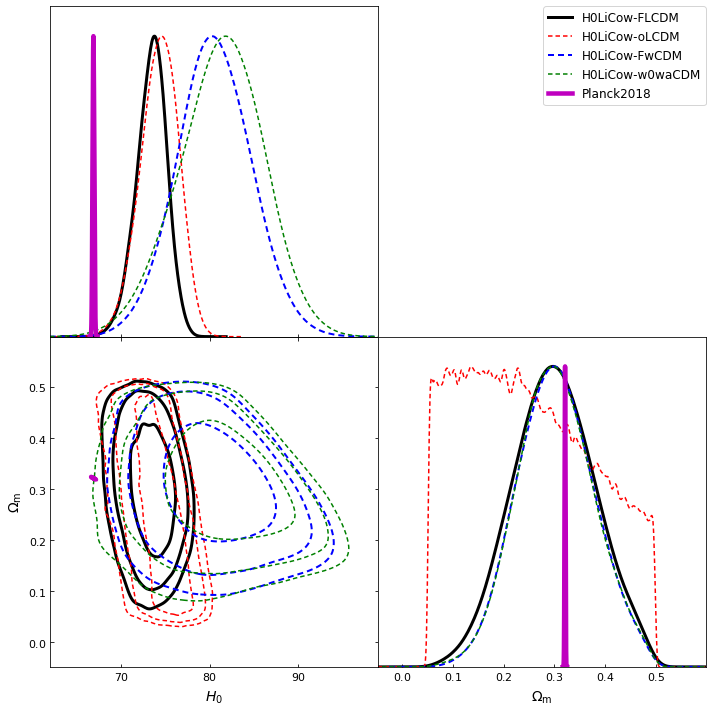

In [9]:
gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result_holicow, filled=False,contour_lws=[3,1.5, 2, 1.5,4.5],\
                     contour_ls=['-','--','--','--','-'],\
                     line_args=[{'ls':'-'},{'ls':'--'},{'ls':'--'},{'ls':'--'},{'ls':'-'}],)
plt.savefig('H0LiCOW-Planck-allN.png')

Removed no burn in


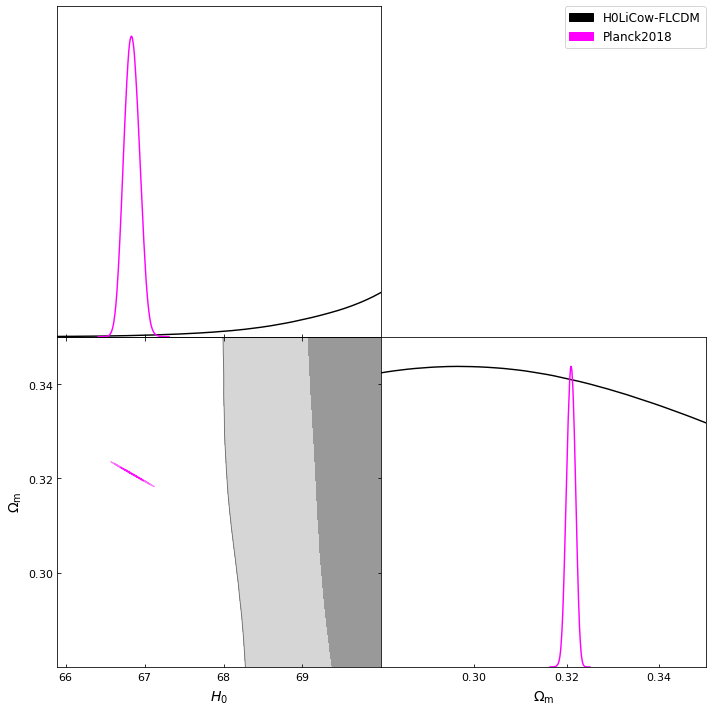

In [10]:
result_holicow2 = []
for cosmology in cosmologies[:1]:
    savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
    samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
    samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
    H0s_list = [[s[0] for s in samples] for samples in samples_list]
    Oms_list = [[s[1] for s in samples] for samples in samples_list]
    result3 = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1])], \
                        names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$"], \
                    label='H0LiCow-{}'.format(cosmology),ranges=[[62,70],[0.28,0.35]])
    result3.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result_holicow2.append(result3)
result_holicow2.append(result1)
gdplot2 = gdplt.get_subplot_plotter(subplot_size=5)
gdplot2.settings.num_plot_contours = 3
gdplot2.triangle_plot(result_holicow2, filled=True,contour_colors=['black','magenta'] )
plt.savefig('H0LiCOW-Planck-allN-zoom.png')

In [11]:
cosmologies = ["FLCDM", "oLCDM" ,"FwCDM","w0waCDM"]
result3 = []
cosmology=cosmologies[0]
savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
H0s_list = [[s[0] for s in samples] for samples in samples_list]
Oms_list = [[s[1] for s in samples] for samples in samples_list]
for i in range(len(lenses)):
    result = MCSamples(samples=[np.asarray(H0s_list[i]),np.asarray(Oms_list[i])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,lenses[i]))
    result.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result3.append(result)
result = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,"joint"))
result3.append(result)

result4 = []
cosmology=cosmologies[2]
savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
H0s_list = [[s[0] for s in samples] for samples in samples_list]
Oms_list = [[s[1] for s in samples] for samples in samples_list]
ws_list = [[s[2] for s in samples] for samples in samples_list]
for i in range(len(lenses)):
    result = MCSamples(samples=[np.asarray(H0s_list[i]),np.asarray(Oms_list[i]),np.asarray(ws_list[i])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$w$"], \
                label='H0LiCow-{}-{}'.format(cosmology,lenses[i]))
    result.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result4.append(result)
result = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1]),np.asarray(ws_list[-1])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$w$"], \
                label='H0LiCow-{}-{}'.format(cosmology,"joint"))
result4.append(result)
    
result5 = []
cosmology=cosmologies[1]
savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
H0s_list = [[s[0] for s in samples] for samples in samples_list]
Oms_list = [[s[1] for s in samples] for samples in samples_list]
Oks_list = [[s[2] for s in samples] for samples in samples_list]
for i in range(len(lenses)):
    result = MCSamples(samples=[np.asarray(H0s_list[i]),np.asarray(Oms_list[i]),np.asarray(Oks_list[i])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$\Omega_{\mathrm{k}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,lenses[i]))
    result.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result5.append(result)
result = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1]),np.asarray(Oks_list[-1])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$\Omega_{\mathrm{k}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,"joint"))
result5.append(result)

result6 = []
cosmology=cosmologies[3]
savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))
H0s_list = [[s[0] for s in samples] for samples in samples_list]
Oms_list = [[s[1] for s in samples] for samples in samples_list]
w0s_list = [[s[2] for s in samples] for samples in samples_list]
was_list = [[s[3] for s in samples] for samples in samples_list]
for i in range(len(lenses)):
    result = MCSamples(samples=[np.asarray(H0s_list[i]),np.asarray(Oms_list[i]),np.asarray(w0s_list[i]),np.asarray(was_list[i])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$w_{\mathrm{0}}$",r"$w_{\mathrm{a}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,lenses[i]))
    result.updateSettings({'contours': [0.68, 0.95, 0.99]})
    result6.append(result)
result = MCSamples(samples=[np.asarray(H0s_list[-1]),np.asarray(Oms_list[-1]),np.asarray(w0s_list[-1]),np.asarray(was_list[-1])], \
                    names = [r"$H_{\rm{0}}$",r"$\Omega_{\mathrm{m}}$",r"$w_{\mathrm{0}}$",r"$w_{\mathrm{a}}$"], \
                label='H0LiCow-{}-{}'.format(cosmology,"joint"))
result6.append(result)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


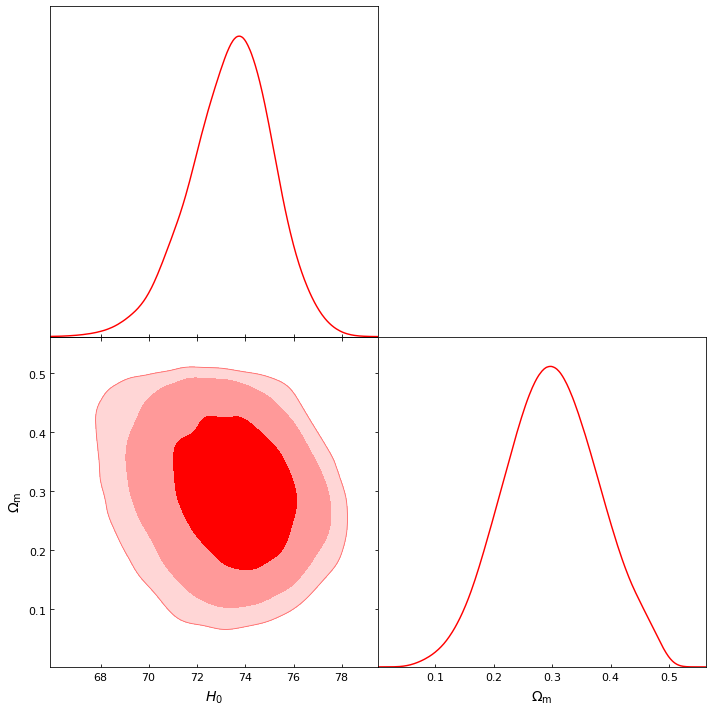

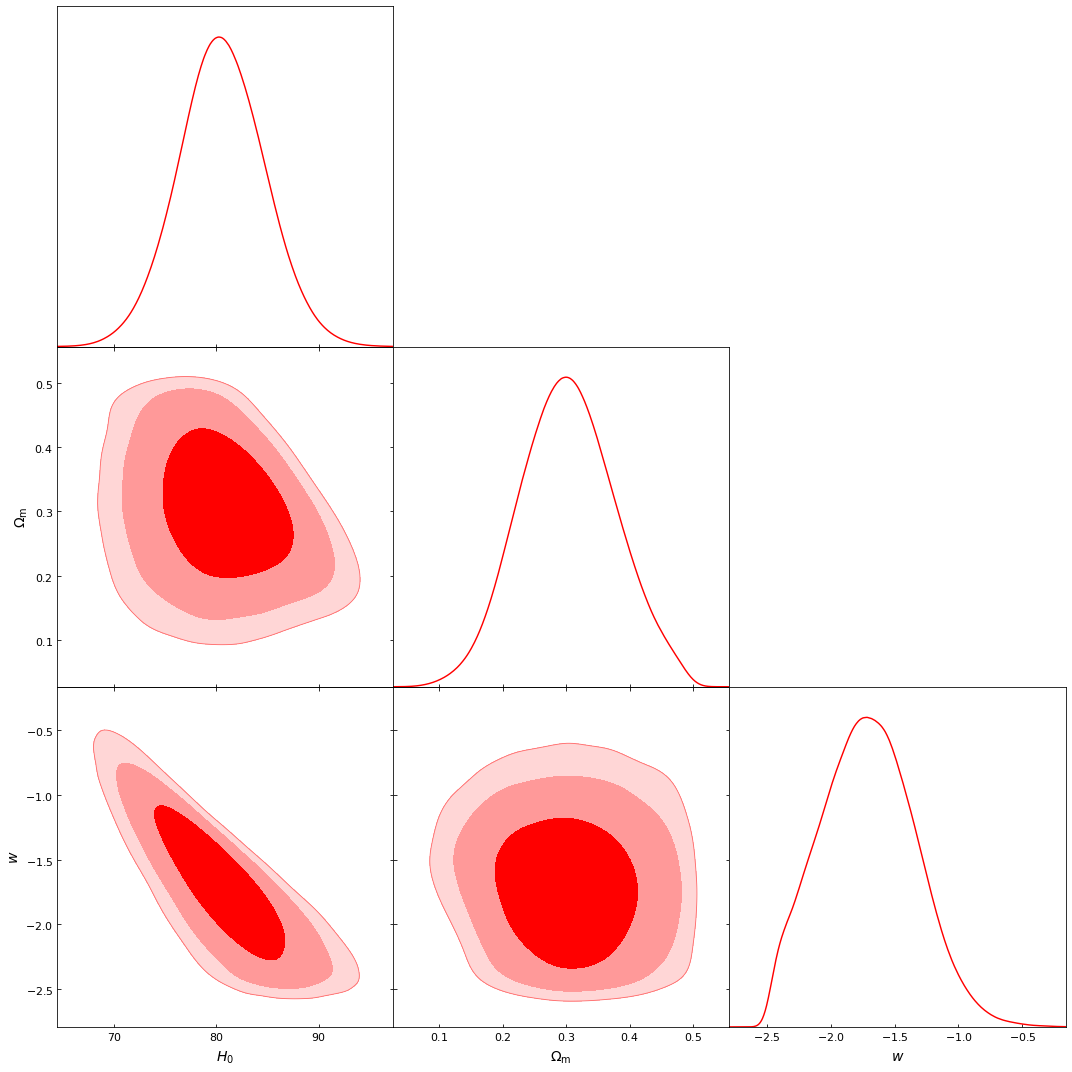

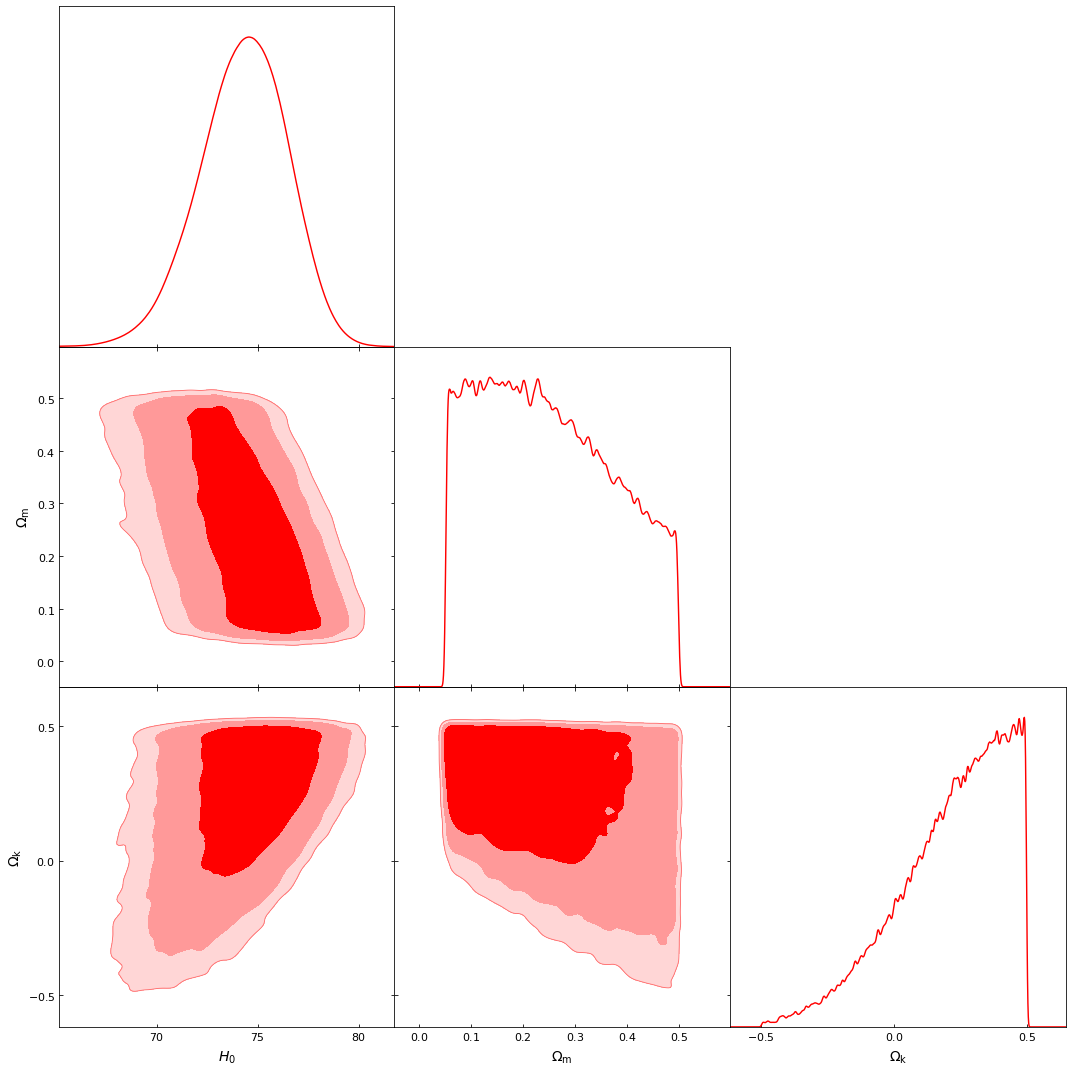

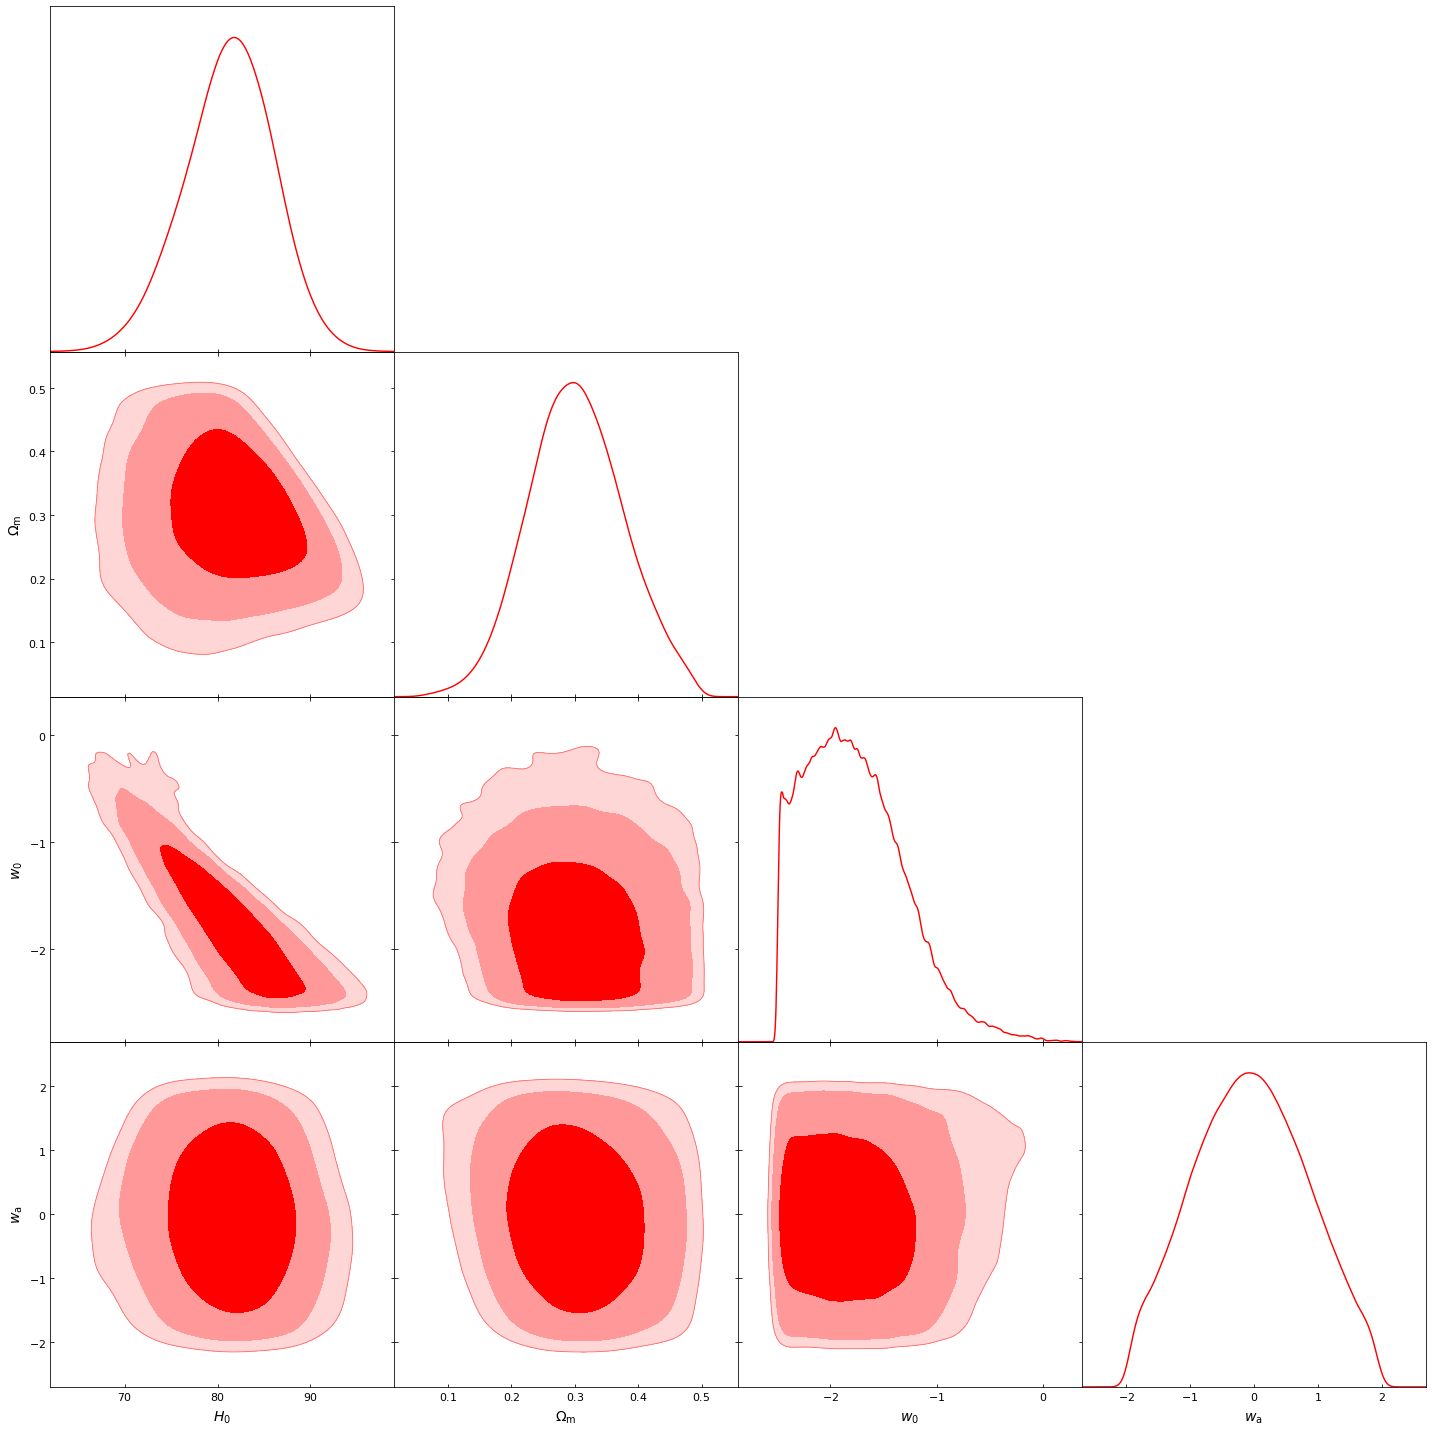

In [12]:
gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result3[-1:], filled=True,contour_colors=['red'])
plt.savefig('H0LiCOW-FLCDM-allN.png')

gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result4[-1:], filled=True,contour_colors=['red'])
plt.savefig('H0LiCOW-FwCDM-allN.png')

gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result5[-1:], filled=True,contour_colors=['red'])
plt.savefig('H0LiCOW-oLCDM-allN.png')

gdplot = gdplt.get_subplot_plotter(subplot_size=5)
gdplot.settings.num_plot_contours = 3
gdplot.triangle_plot(result6[-1:], filled=True,contour_colors=['red'])
plt.savefig('H0LiCOW-w0waCDM-allN.png')

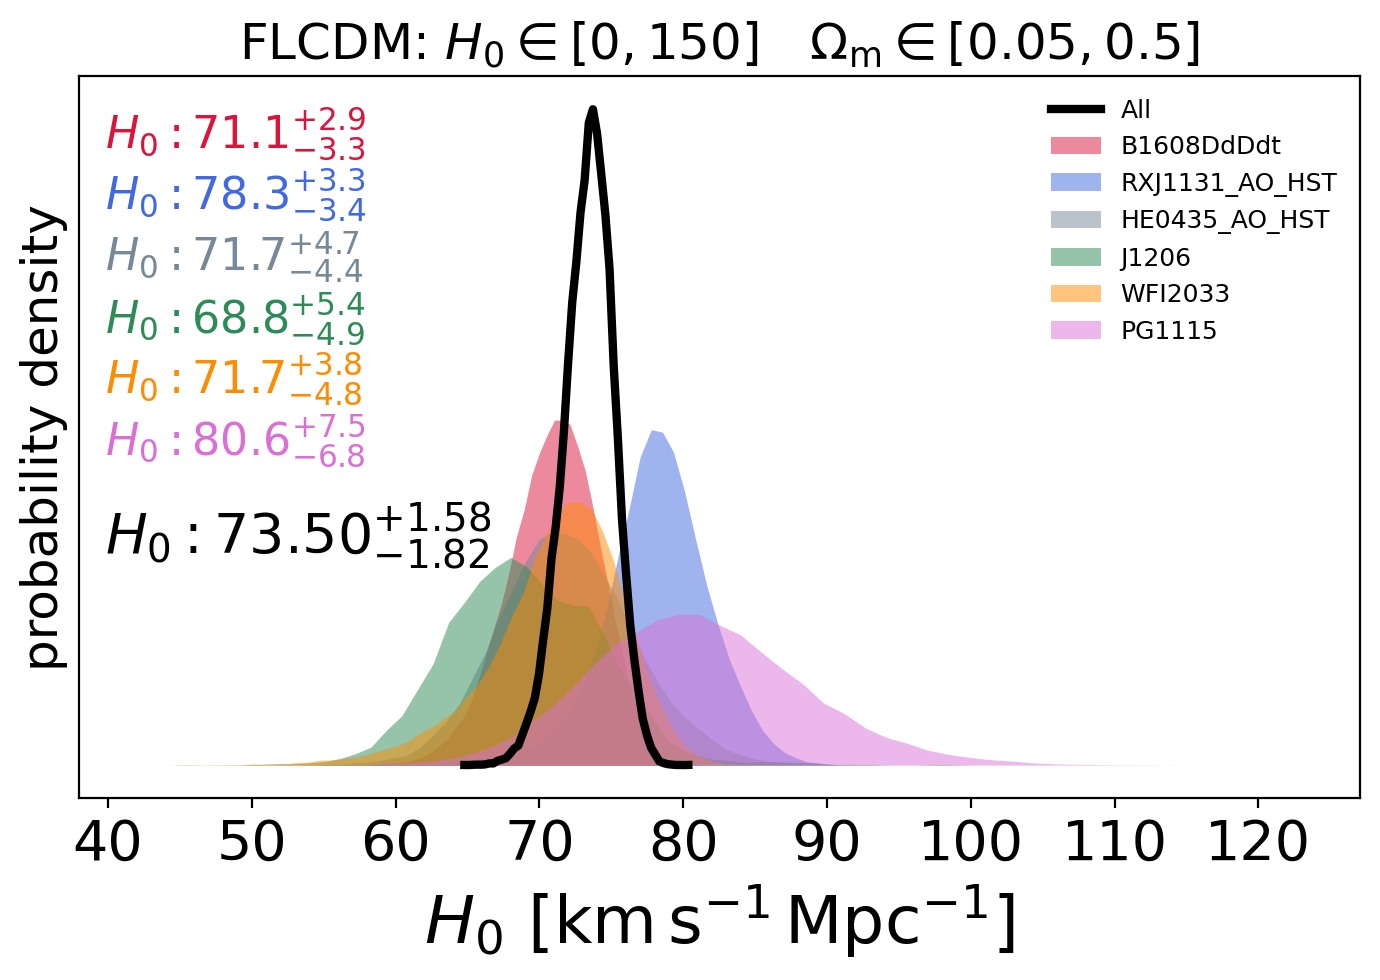

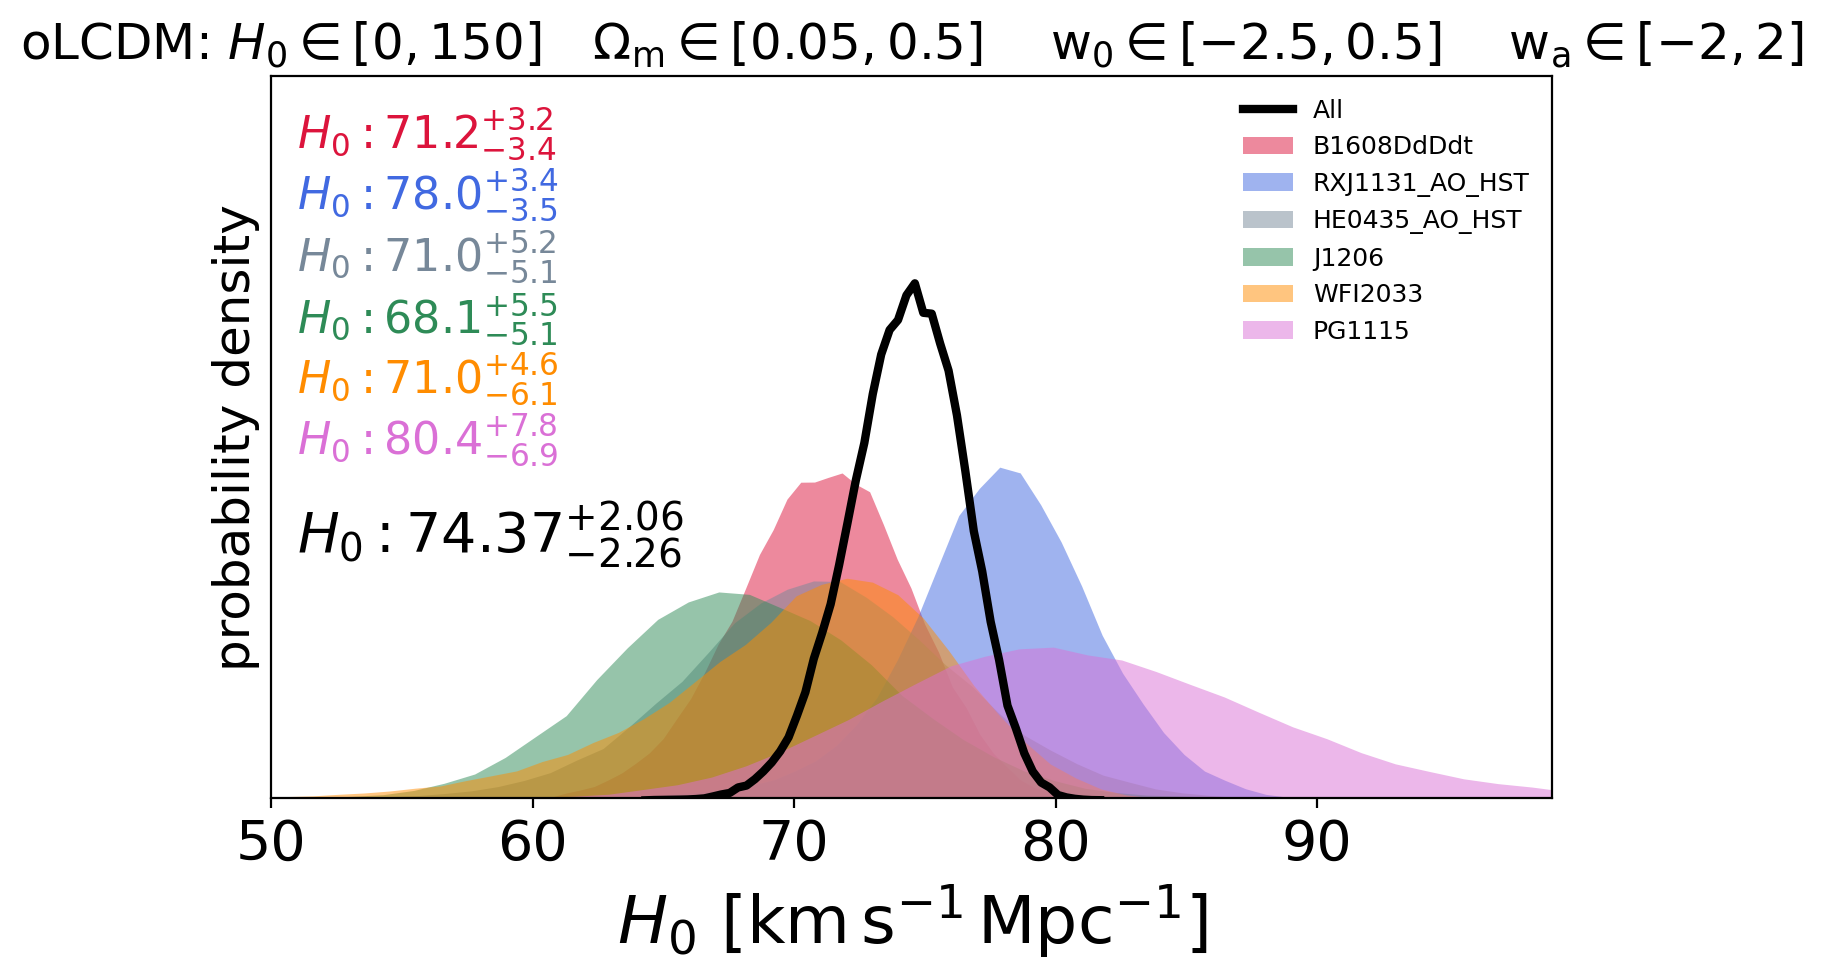

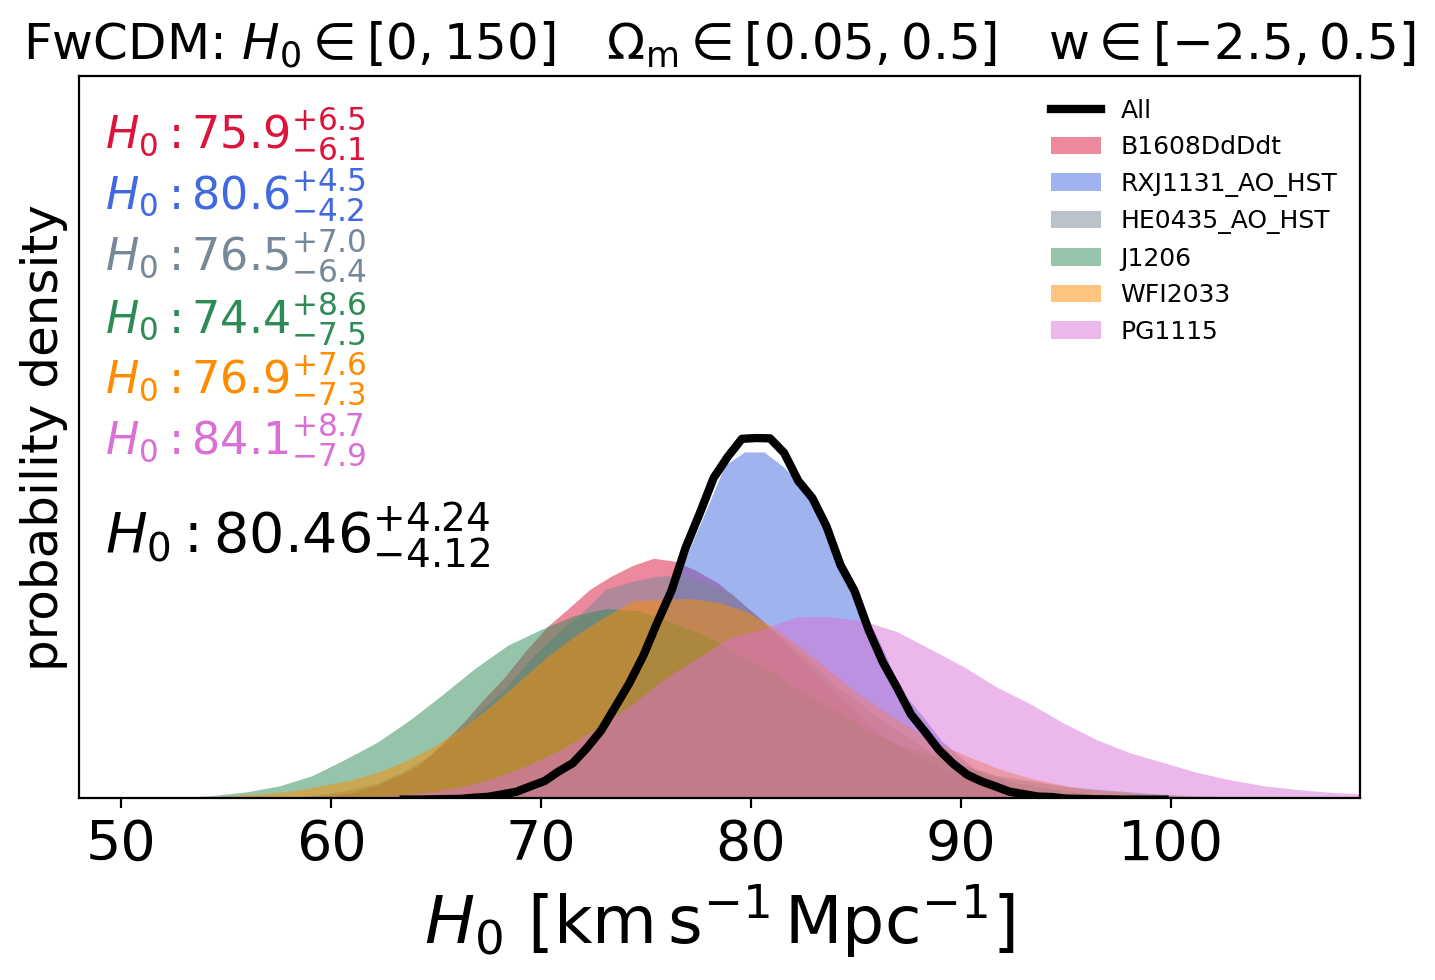

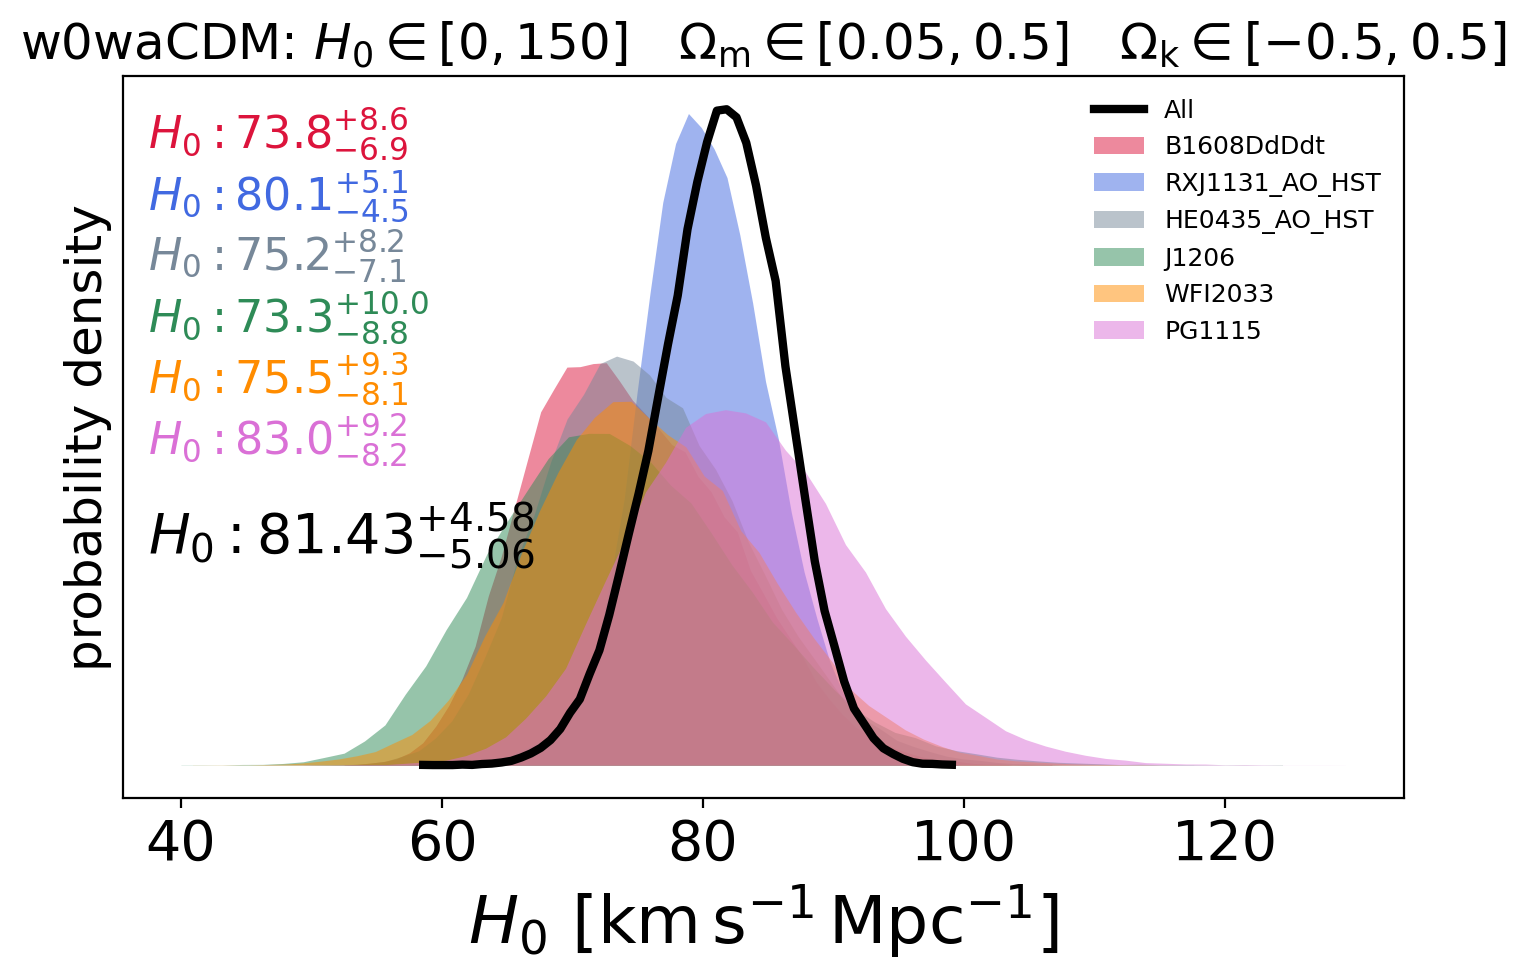

In [13]:
add_logo=False
save_plot=False
plot_combined = True 
for cosmology in cosmologies:

    savedir = os.path.join(samplesdir, cosmology, "%ix%i" % (nwalkers, nsamples))
    samples_list = [lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % lens)) for lens in lenses]
    samples_list.append(lu.readpickle(os.path.join(savedir, "%s_samples.pkl" % ("+".join([l for l in lenses])))))    
    
    ### plot nice H0s histogram 
    plt.figure(figsize=(7, 5), dpi=200)
    ax = plt.subplot(1, 1, 1)

    H0s_list = [[s[0] for s in samples] for samples in samples_list]
    try:
        others_list = [[s[1] for s in samples] for samples in samples_list]
    except:
         others_list = H0s_list
    toplot = H0s_list
    
    percentiles = [16, 50, 84]
    #colors = ["crimson", "royalblue", "lightslategrey", "seagreen", "darkorange", "orchid", "mediumturquoise", "black"]
    colors = ["crimson", "royalblue", "lightslategrey", "seagreen", "darkorange", "orchid", "black"]
    nbins = 55
    title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
    fmt = "{{0:{0}}}".format(".1f").format
    fmt2 = "{{0:{0}}}".format(".2f").format


    # loop over the lenses, shaded histograms
    for il, lens in enumerate(lenses):

        h, be = np.histogram(toplot[il], bins=nbins, density=True)
        xs = [(b+be[ind+1])/2. for ind, b in enumerate(be[:-1])]
        plt.plot(xs, h, alpha=0.5, color=colors[il], linewidth=0.0)
        plt.fill_between(xs, h, alpha=0.5, color=colors[il], linewidth=0.0, label=r'%s' % lens)

        # add the values
        pcs = np.percentile(toplot[il], q=percentiles)
        txt = r'$H_{0}: $' + title.format(fmt(pcs[1]), fmt(pcs[1]-pcs[0]), fmt(pcs[2]-pcs[1]))
        plt.annotate(txt, xy=(0.0, 0.0), xytext=(0.02, 0.9-0.085*il), xycoords='axes fraction',
                     fontsize=16, color=colors[il])


    if plot_combined:
    
        # plot the combined result
        h, be = np.histogram(toplot[-1], bins=nbins, density=True)
        xs = [(b+be[ind+1])/2. for ind, b in enumerate(be[:-1])]
        plt.plot(xs, h, alpha=1.0, color=colors[-1], linewidth=3.0, label=r'All')

        # add the values
        pcs = np.percentile(toplot[-1], q=percentiles)
        txt = r'$H_{0}: $' + title.format(fmt2(pcs[1]), fmt2(pcs[1] - pcs[0]), fmt2(pcs[2] - pcs[1]))
        plt.annotate(txt, xy=(0.0, 0.0), xytext=(0.02, 0.85 - 0.085 * len(lenses)), xycoords='axes fraction',
                     fontsize=20, color=colors[-1])
    
    if add_logo : 
        #add H0licow logo 
        from matplotlib._png import read_png
        from matplotlib.offsetbox import OffsetImage, AnnotationBbox

        im = read_png(os.path.join("h0licow_transparent.png"))
        imagebox = OffsetImage(im, zoom=0.09, interpolation="sinc", resample = True)
        ab = AnnotationBbox(imagebox,  xy=(0.88, 0.45), xycoords='axes fraction', xybox = (0, 0),
                boxcoords="offset points",
                pad=0.0, frameon=False
                )
        ax.add_artist(ab)


    # fine tune
    if cosmology == "FLCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} \in \rm{[0.05, 0.5]}$"%(cosmology)
    elif cosmology == "FwCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} \in \rm{[0.05, 0.5]} \ \ \  w \in \rm{[-2.5, 0.5]}$"%(cosmology)
    elif cosmology == "oLCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} \in \rm{[0.05, 0.5]} \ \ \ \ w_{\rm{0}} \in \rm{[-2.5, 0.5]}\ \ \ \ w_{\rm{a}} \in \rm{[-2, 2]}$"%(cosmology)
    elif cosmology == "w0waCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} \in \rm{[0.05, 0.5]} \ \ \ \Omega _{\rm{k}} \in \rm{[-0.5, 0.5]}$"%(cosmology)
    elif cosmology == "ULCDM":
        title = r"%s: $H_{\rm{0}} \in \rm{[0, 150]} \ \ \ \Omega _{\rm{m}} = 0.3$"%(cosmology)

    plt.title(title, fontsize=18)
    plt.xlabel(r"$H_{\rm{0}}\rm{\ [km\,s^{-1}\,Mpc^{-1}]}$", fontsize=24)
    plt.ylabel("probability density", fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=20)
    plt.yticks([])

    legend = plt.legend(loc="upper right", prop={'size': 9} )
    legend.get_frame().set_alpha(0.0)
    if cosmology == "FLCDM":
        pass
#         plt.xlim([50, 99])
        #plt.ylim([max(h)*0.005, max(h)*1.25])
#         plt.ylim([0.0013492736086723317, 0.33731840216808295])
    elif cosmology == "oLCDM":
        plt.xlim([50, 99])
        plt.ylim([max(h)*0.005, max(h)*1.4])
    elif cosmology == "FwCDM":
        plt.xlim([48, 109])
        plt.ylim([max(h)*0.005, max(h)*2.0])
    plt.tight_layout()

    if save_plot : 
        plt.savefig(os.path.join(savedir, "H0_%s_%s.png" % (cosmology, "+".join([l.name for l in lenses]))))
        plt.savefig(os.path.join(savedir, "H0_%s_%s.pdf" % (cosmology, "+".join([l.name for l in lenses]))))
    plt.show()
    